## Author-Himanshu Parashar 
### Technical task -2- Prediction using Unsupervised ML (Level - Beginner)

#### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
### Import all the required libraries

In [38]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline


# Read the CSV file

In [28]:
df=pd.read_csv("iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Dropping the unnecessary columns

In [29]:
df.drop(['Id', 'Species'],axis='columns',inplace=True)

In [30]:
df


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# K-Means

In [31]:
x=df.iloc[:,[0,1,2,3]].values
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)

#### Plotting an ELBOW GRAPH to find the correct number of cluster

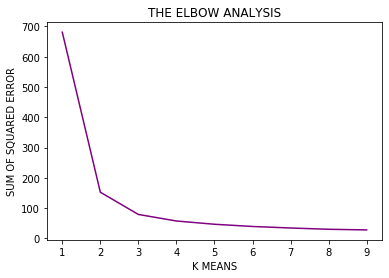

In [32]:

plt.xlabel('K MEANS')
plt.ylabel('SUM OF SQUARED ERROR')
plt.title('THE ELBOW ANALYSIS')
plt.plot(k_rng,sse,color='purple')

##### This show that 3 is optimum number of cluster to form in iris dataset

In [33]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(x)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

#####  Adding a cluster column to show which cluster does the particular feature belong to

In [34]:
df['cluster']=y_predict
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [35]:

df.cluster.unique()

array([0, 2, 1], dtype=int64)

In [36]:

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

# Plotting a scatter plot showing the cluster

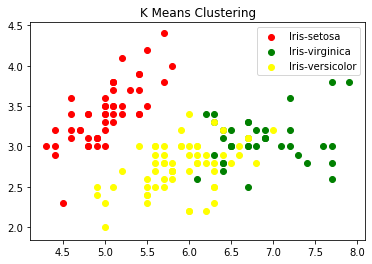

In [37]:
plt.title('K Means Clustering')
plt.scatter(x[y_predict==0,0],x[y_predict==0,1],c='red',label='Iris-setosa')
plt.scatter(x[y_predict==1,0],x[y_predict==1,1],c='green',label='Iris-virginica')
plt.scatter(x[y_predict==2,0],x[y_predict==2,1],c='yellow',label='Iris-versicolor')
plt.legend(loc='best')